In [27]:
# from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter

# gridSize = ContinuousParameter('gridSize', min_value=3, max_value=20)
# edgeMaxSpeed = ContinuousParameter('edgeMaxSpeed', min_value=1, max_value=25)
# maxSpeed = ContinuousParameter('maxSpeed', min_value=1, max_value=25)
# edgeLength = ContinuousParameter('edgeLength', min_value=30, max_value=200)
# numberOfLanes = DiscreteParameter('numberOfLanes', domain=[1,2,3])
# accel = ContinuousParameter('accel', 1., 6.)

# parameter_space = ParameterSpace([gridSize, edgeMaxSpeed, maxSpeed, edgeLength, numberOfLanes, accel])
import experimental_design.config as config
parameter_space = config.get_parameter_space()

In [4]:
import pickle
import GPy
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper

init_X, init_Y = pickle.load(open('../experimental_design/2000_init_points_6_param.pkl', 'rb')) # load 2000 init points
# init_X, init_Y = pickle.load(open('../experimental_design/250_init_points_6_param.pkl', 'rb')) # load 250 init points

emulator = GPRegression(init_X, init_Y)
emukit_model = GPyModelWrapper(emulator)
emukit_model.optimize()
emulator

Optimization restart 1/1, f = -4217.651213520824


GP_regression.,value,constraints,priors
rbf.variance,5234.502967668782,+ve,
rbf.lengthscale,62.22380320777101,+ve,
Gaussian_noise.variance,0.00031533409139708046,+ve,


In [20]:
from emukit.sensitivity.monte_carlo import MonteCarloSensitivity


num_monte_carlo_points=10000
sensitivity_sumo=MonteCarloSensitivity(model = emukit_model, input_domain = parameter_space)
main_effects, total_effects, total_variance = sensitivity_sumo.compute_effects(num_monte_carlo_points=num_monte_carlo_points)

In [21]:
import numpy as np
for k in main_effects.keys():
    main_effects[k] = main_effects[k][0]
for k in total_effects.keys():
    total_effects[k] = total_effects[k][0]

{'GP Monte Carlo': {'gridSize': -0.04686514036179401, 'edgeMaxSpeed': 0.4079786106527417, 'maxSpeed': 0.42561123802921236, 'edgeLength': -0.0331783964887588, 'numberOfLanes': -0.05042279434822016, 'accel': -0.02622141648573169}}


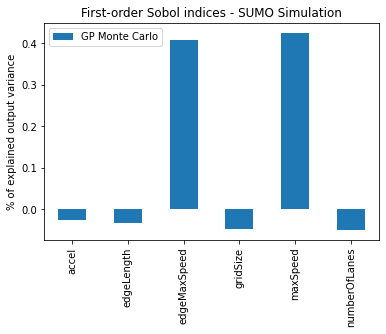

In [22]:
import pandas as pd

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

d = {'GP Monte Carlo': main_effects}
pd.DataFrame(d).plot.bar(ax=ax)
ax.set_title('First-order Sobol indices - SUMO Simulation')
ax.set_ylabel('% of explained output variance')

fig.show()

# mlai.write_figure(filename='first-order-sobol-indices-ishigami.svg', directory='./uq')